In [5]:
import pymolviz as pmv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def read_xyz(file):
    with open(file, 'r') as f:
        lines = f.readlines()[11:]
    coords = []
    for line in lines:
        coords.append([float(x) for x in line.split()[:5]])
    df = pd.DataFrame(coords, columns=['x', 'y', 'z', 'density', 'potential']).dropna()
    return df

In [18]:
## Load data
lig = 'lig_12'
in_path = f'../pot_den_angstrom/dir{lig}/dir{lig}.xyz'
df = read_xyz(in_path)

22293
0.99999252


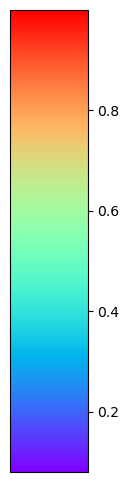

In [21]:
## Potential

df_pot = df[df['potential'] > 0.08] # lower limit
df_pot = df_pot[df_pot['potential'] <= 1] # upper limit
print(len(df_pot['potential']))
print(max(df_pot['potential']))

coords = np.array(df_pot[['x', 'y', 'z']].values)
potential = df_pot['potential'].values

points_pot = pmv.Points(coords, potential, colormap = 'rainbow')
points_pot.to_script(f'pot_{lig}').write(f'pot_{lig}.py')

fig = points_pot.get_color_map()
fig.savefig(f'colorbar/pot_{lig}.png', bbox_inches='tight')

16294
0.99512233


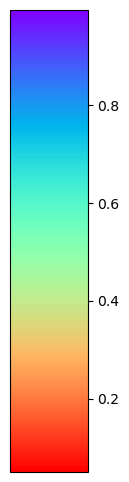

In [23]:
## Density

df_den = df[df['density'] > 0.05] # lower limit
df_den = df_den[df_den['density'] <= 1] # upper limit
print(len(df_den['density']))
print(max(df_den['density']))
coords = np.array(df_den[['x', 'y', 'z']].values)
density = np.array(df_den['density'].values)

points_den = pmv.Points(coords, density, colormap = 'rainbow_r')
points_den.to_script(f'density_{lig}').write(f'density_{lig}.py')

fig = points_den.get_color_map()
fig.savefig(f'colorbar/density_{lig}.png', bbox_inches='tight')